In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv('/kaggle/input/top-264-speedrun-com-leaderboard-stats/full_speedrun_dataset.csv')

# Display the structure of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450862 entries, 0 to 450861
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   run_id                  450862 non-null  object 
 1   player_id               437931 non-null  object 
 2   place                   450862 non-null  int64  
 3   speedrun_time           450862 non-null  float64
 4   is_verified             450862 non-null  bool   
 5   verify_date             446748 non-null  object 
 6   submitted_date          448039 non-null  object 
 7   examiner_id             448037 non-null  object 
 8   timing_type             450862 non-null  object 
 9   platform_id             435914 non-null  object 
 10  platform_name           435914 non-null  object 
 11  platform_released_year  435914 non-null  float64
 12  is_level_cat            450862 non-null  bool   
 13  level_id                184156 non-null  object 
 14  level_name          

In [2]:
# Get the number of records in the dataset
num_records = len(df)
print("Number of records in the dataset:", num_records)


Number of records in the dataset: 450862


In [3]:
# Display unique values in the 'timing_type' column
unique_timing_types = df['timing_type'].unique()
print("Unique values in the 'timing_type' column:", unique_timing_types)


Unique values in the 'timing_type' column: ['realtime' 'ingame' 'realtime_noloads']


In [4]:
# Display summary statistics for the 'speedrun_time' column
speedrun_time_stats = df['speedrun_time'].describe()
print("Summary statistics for the 'speedrun_time' column:\n", speedrun_time_stats)


Summary statistics for the 'speedrun_time' column:
 count    450862.000000
mean       1530.611883
std        7998.872652
min           0.001000
25%          42.692500
50%         190.733000
75%        1009.000000
max      465152.000000
Name: speedrun_time, dtype: float64


In [5]:
# Count the number of unique games in the dataset
num_unique_games = df['game_id'].nunique()
print("Number of unique games in the dataset:", num_unique_games)


Number of unique games in the dataset: 264


In [6]:
# Count the number of unique players
num_unique_players = df['player_id'].nunique()
print("Number of unique players in the dataset:", num_unique_players)


Number of unique players in the dataset: 179679


In [7]:
# Sort the dataset by speedrun_time and retrieve the top 10 records
top_10_speedruns = df.sort_values(by='speedrun_time').head(10)

# Display the top 10 fastest speedruns
print("Top 10 Fastest Speedruns Across All Games and Categories:")
print(top_10_speedruns[['game_name', 'cat_name', 'player_name', 'speedrun_time']])


Top 10 Fastest Speedruns Across All Games and Categories:
                  game_name         cat_name   player_name  speedrun_time
411432  Minecraft (Classic)  Meme Categories         Meegz          0.001
411422  Minecraft (Classic)  Meme Categories     DimitrovN          0.001
411421  Minecraft (Classic)  Meme Categories        Mateir          0.001
411420  Minecraft (Classic)  Meme Categories   Senorbruh69          0.001
411419  Minecraft (Classic)  Meme Categories   eugenecrazy          0.001
411418  Minecraft (Classic)  Meme Categories          L1xi          0.001
411417  Minecraft (Classic)  Meme Categories     Fredric27          0.001
412284  Minecraft (Classic)  Meme Categories    Connork007          0.001
412285  Minecraft (Classic)  Meme Categories  SheLovesEnvy          0.001
412286  Minecraft (Classic)  Meme Categories      partyeye          0.001


**How many speedruns are level-specific (is_level_cat) vs. gamewide categories?**

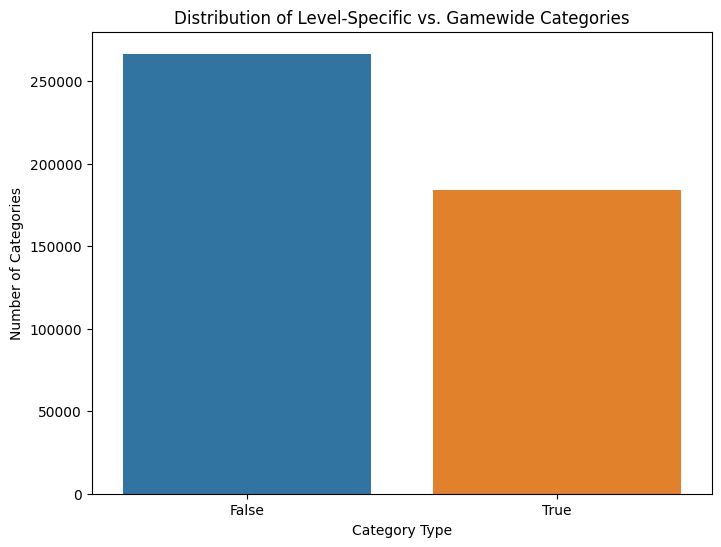

In [8]:
# Count the number of level-specific and gamewide categories
category_counts = df['is_level_cat'].value_counts()

# Plot the distribution of categories
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Distribution of Level-Specific vs. Gamewide Categories")
plt.xlabel("Category Type")
plt.ylabel("Number of Categories")
plt.show()


**How many speedruns are submitted per year?**

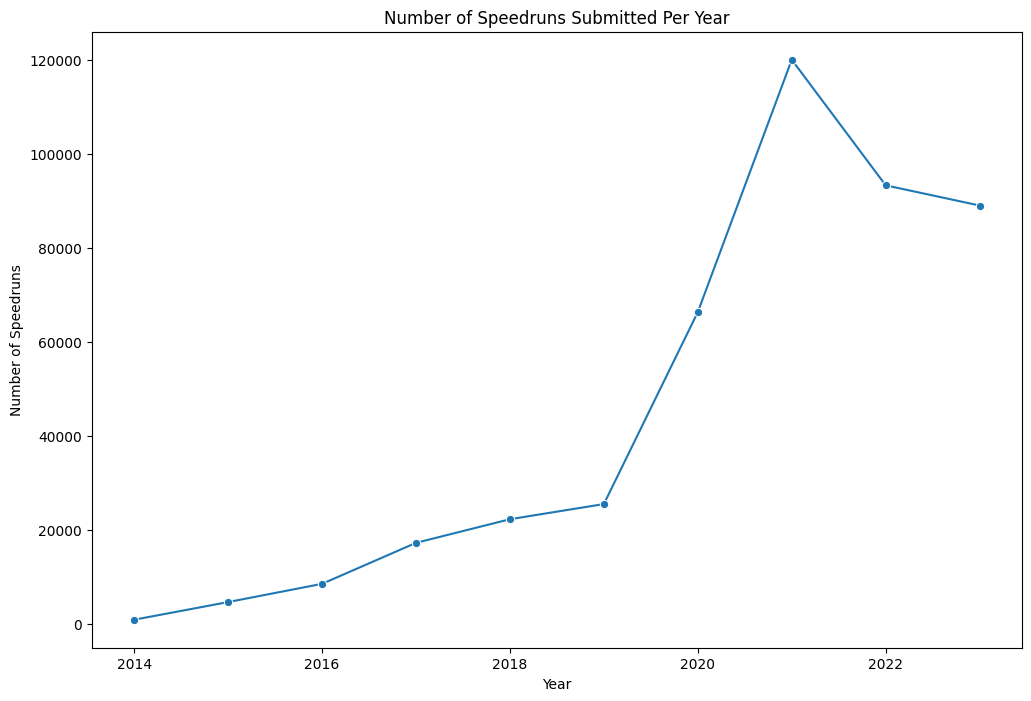

In [9]:
# Extract the year from the 'submitted_date' column
df['submitted_year'] = pd.to_datetime(df['submitted_date']).dt.year

# Count the number of speedruns submitted per year
speedruns_per_year = df['submitted_year'].value_counts().sort_index()

# Plot the number of speedruns submitted per year
plt.figure(figsize=(12, 8))
sns.lineplot(x=speedruns_per_year.index, y=speedruns_per_year.values, marker='o')
plt.title("Number of Speedruns Submitted Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Speedruns")
plt.show()


**What is the trend of player sign-ups over the years?**

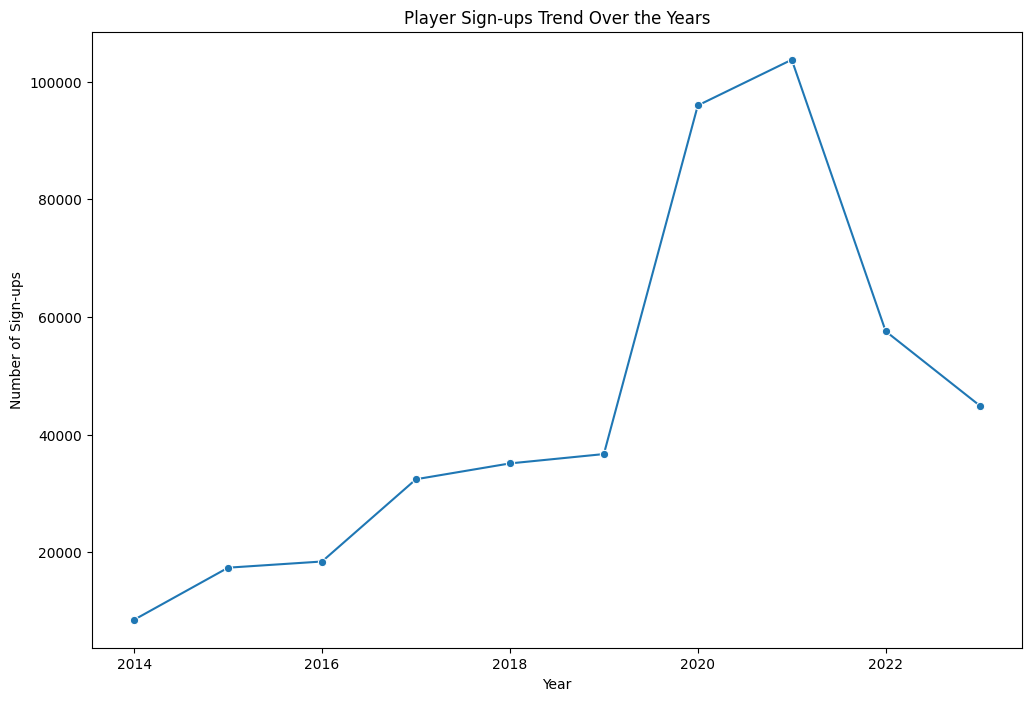

In [10]:
# Extract the year from the 'player_signup_date' column
df['signup_year'] = pd.to_datetime(df['player_signup_date']).dt.year

# Count the number of player sign-ups per year
signups_per_year = df['signup_year'].value_counts().sort_index()

# Plot the trend of player sign-ups over the years
plt.figure(figsize=(12, 8))
sns.lineplot(x=signups_per_year.index, y=signups_per_year.values, marker='o')
plt.title("Player Sign-ups Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Sign-ups")
plt.show()


**What are the top 10 players with the most submitted speedruns?**

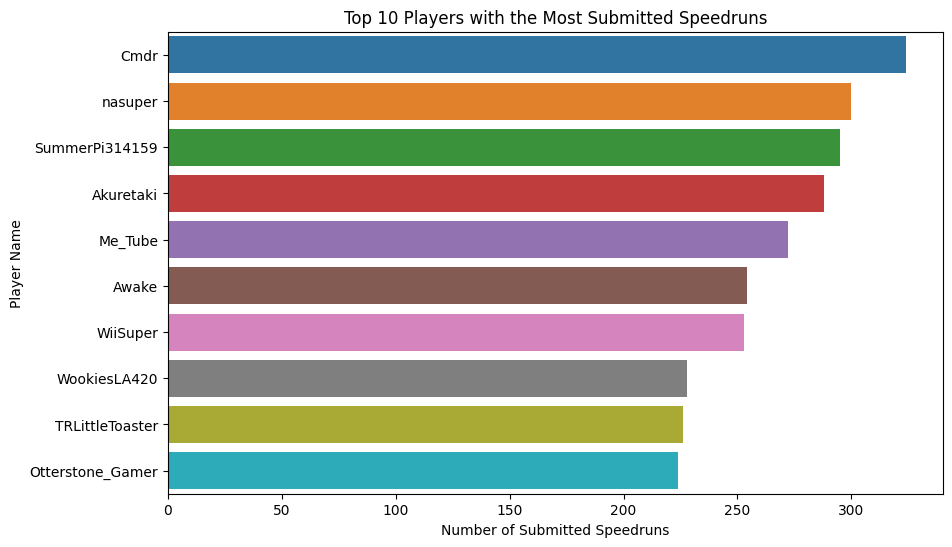

In [11]:
# Group by player and count the number of submitted speedruns
player_submission_counts = df['player_name'].value_counts().head(10)

# Plot the top 10 players with the most submitted speedruns
plt.figure(figsize=(10, 6))
sns.barplot(x=player_submission_counts.values, y=player_submission_counts.index, orient='h')
plt.title("Top 10 Players with the Most Submitted Speedruns")
plt.xlabel("Number of Submitted Speedruns")
plt.ylabel("Player Name")
plt.show()


**Is there a correlation between the release year of the platform and speedrun times?**

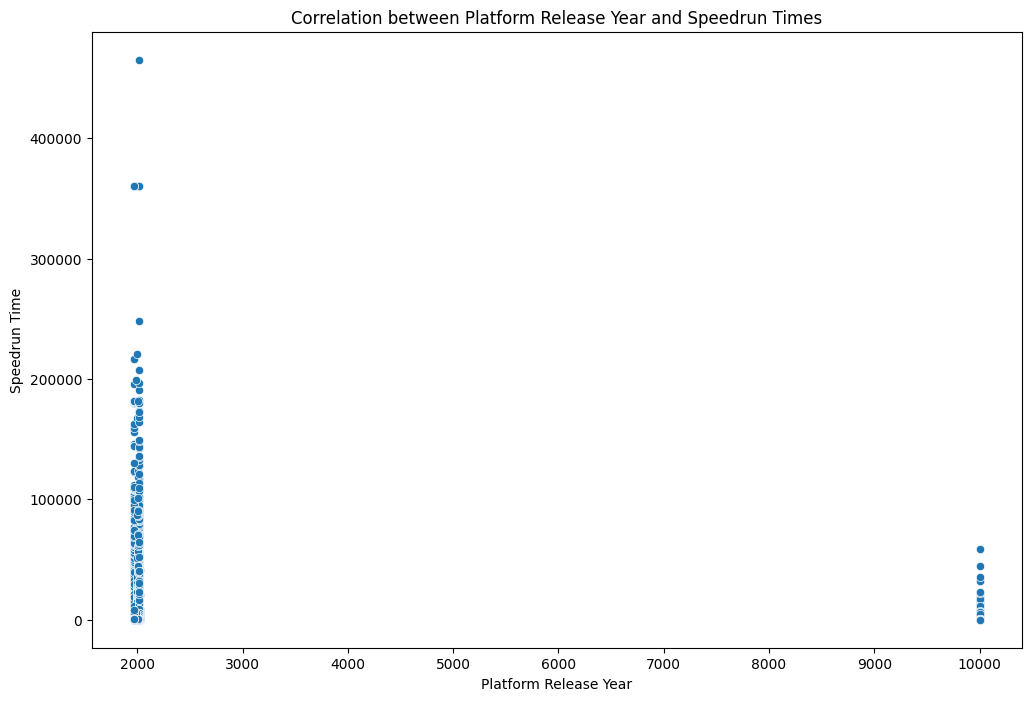

In [12]:
# Plot a scatter plot to explore the correlation
plt.figure(figsize=(12, 8))
sns.scatterplot(x='platform_released_year', y='speedrun_time', data=df)
plt.title("Correlation between Platform Release Year and Speedrun Times")
plt.xlabel("Platform Release Year")
plt.ylabel("Speedrun Time")
plt.show()


**What are the top 10 games with the most speedruns submitted?**

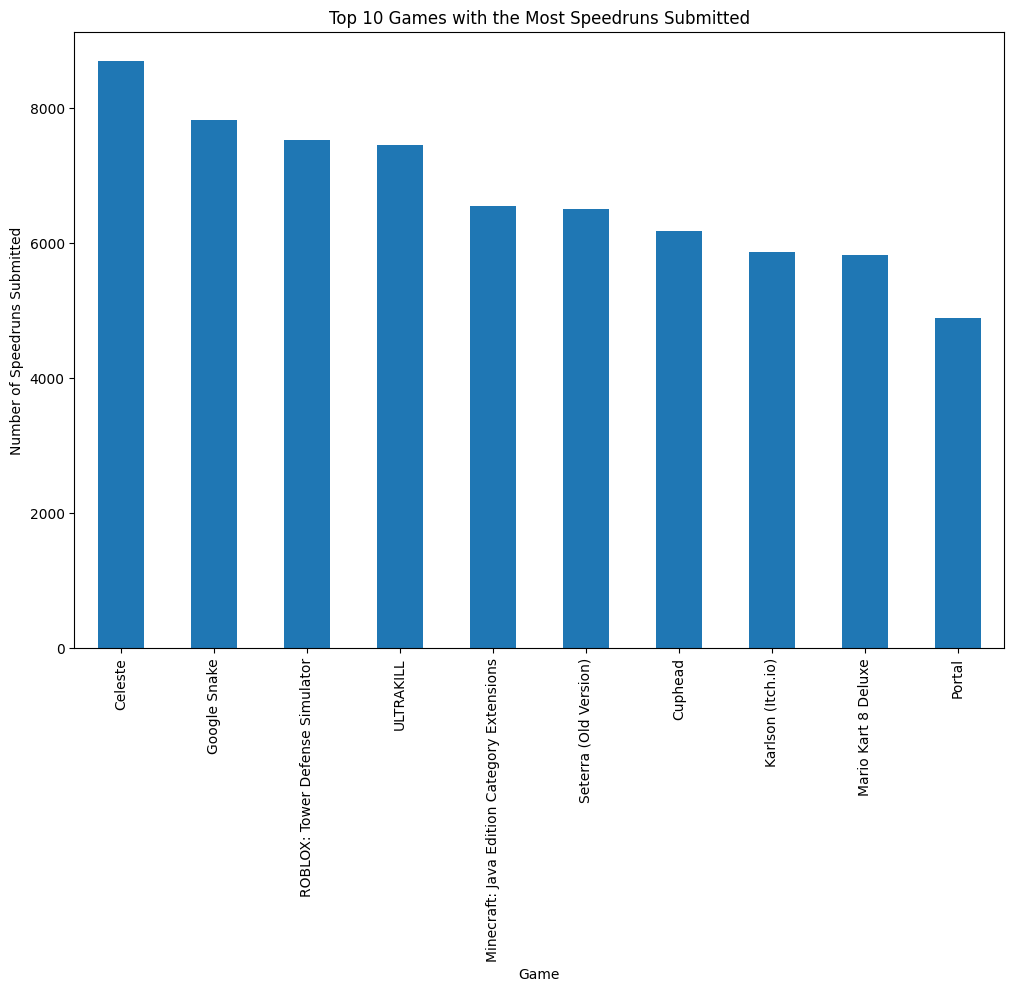

In [13]:
# Count the number of speedruns submitted for each game
top_games = df['game_name'].value_counts().head(10)

# Plot the top 10 games with the most speedruns submitted
plt.figure(figsize=(12, 8))
top_games.plot(kind='bar')
plt.title("Top 10 Games with the Most Speedruns Submitted")
plt.xlabel("Game")
plt.ylabel("Number of Speedruns Submitted")
plt.show()


**How many speedruns are level-specific vs. gamewide categories?**

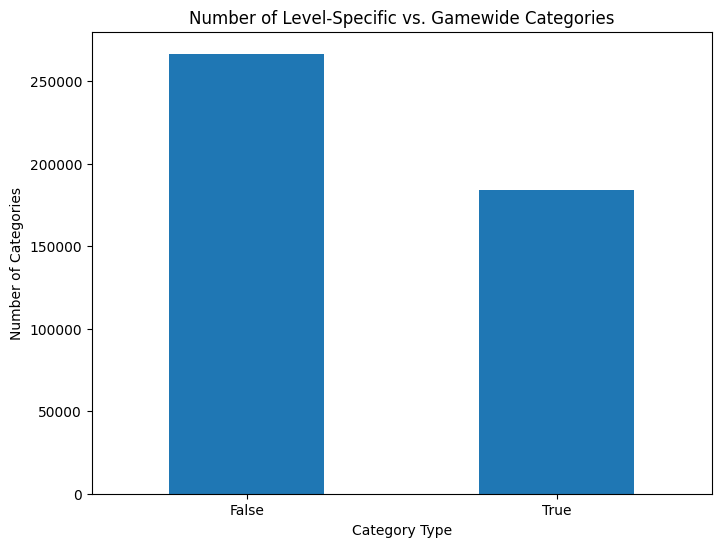

In [14]:
# Count the number of level-specific and gamewide categories
category_counts = df['is_level_cat'].value_counts()

# Plot the number of level-specific vs. gamewide categories
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title("Number of Level-Specific vs. Gamewide Categories")
plt.xlabel("Category Type")
plt.ylabel("Number of Categories")
plt.xticks(rotation=0)
plt.show()


**What are the top 10 countries with the most active speedrunners?**

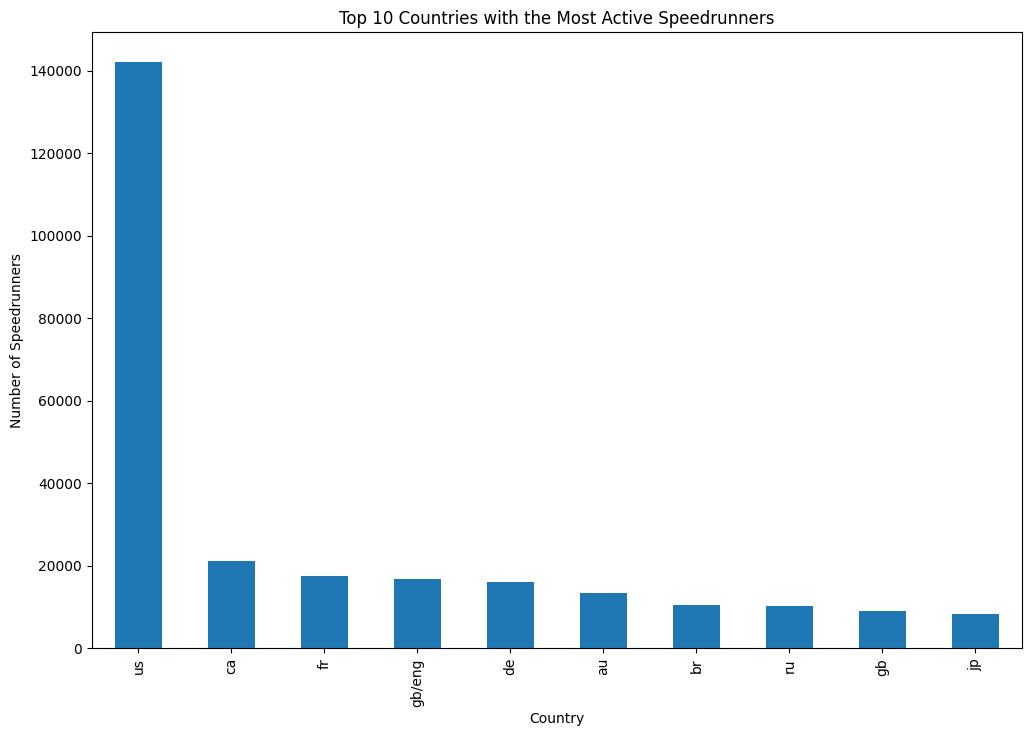

In [15]:
# Count the number of speedrunners from each country
top_countries = df['player_country'].value_counts().head(10)

# Plot the top 10 countries with the most active speedrunners
plt.figure(figsize=(12, 8))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries with the Most Active Speedrunners")
plt.xlabel("Country")
plt.ylabel("Number of Speedrunners")
plt.show()


**How does the distribution of speedrun times vary across different platforms?**

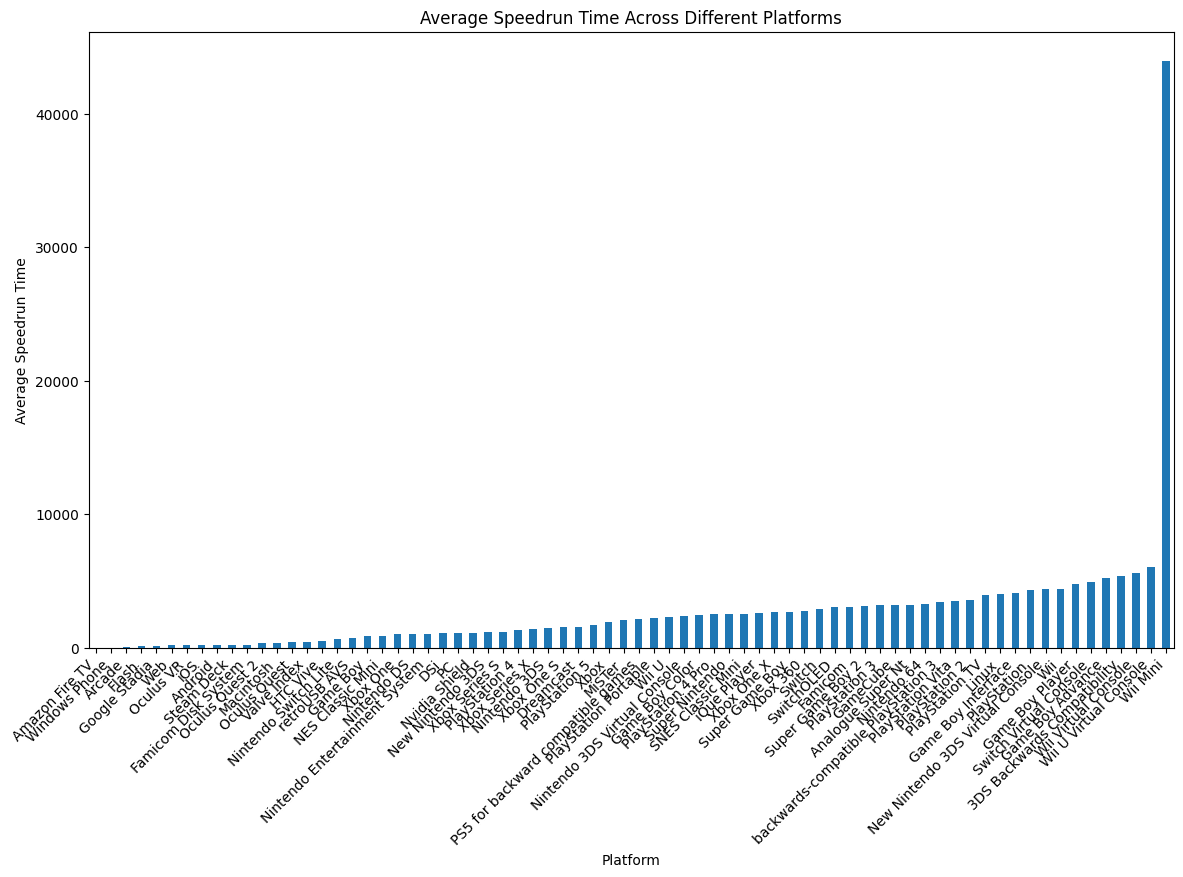

In [16]:
# Plot the average speedrun time for each platform
average_speedrun_time_by_platform = df.groupby('platform_name')['speedrun_time'].mean().sort_values()
plt.figure(figsize=(14, 8))
average_speedrun_time_by_platform.plot(kind='bar')
plt.title("Average Speedrun Time Across Different Platforms")
plt.xlabel("Platform")
plt.ylabel("Average Speedrun Time")
plt.xticks(rotation=45, ha='right')
plt.show()


**How many speedruns are submitted for each year?**

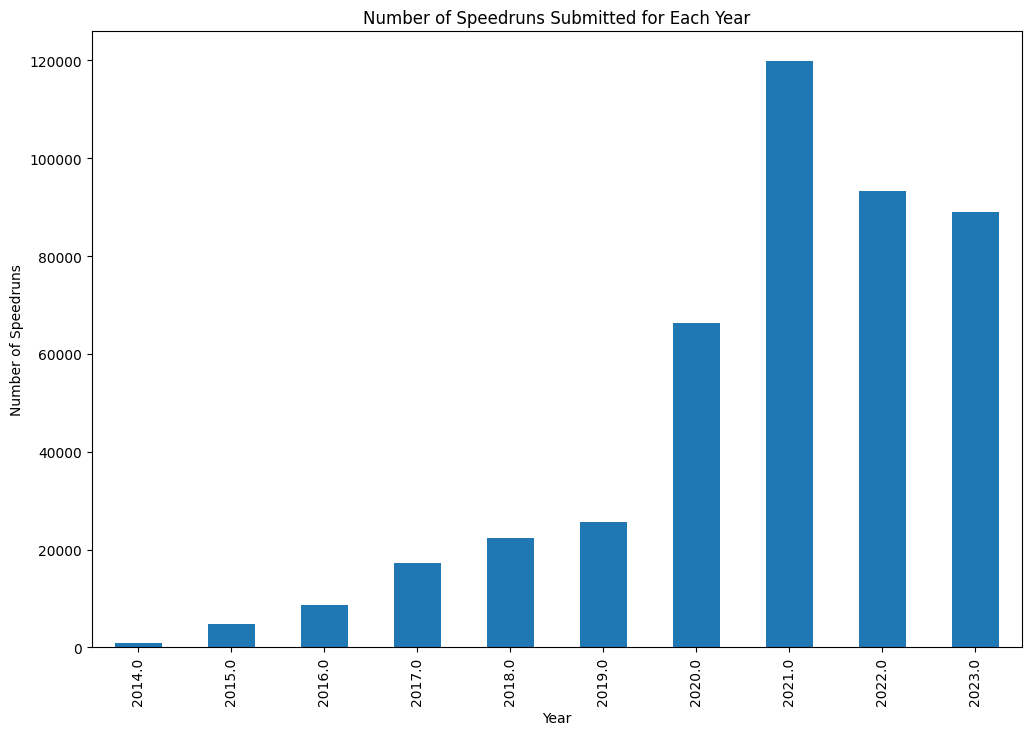

In [17]:
# Extract the year from the 'submitted_date' column
df['submitted_year'] = pd.to_datetime(df['submitted_date']).dt.year

# Count the number of speedruns submitted for each year
speedruns_per_year = df['submitted_year'].value_counts().sort_index()

# Plot the number of speedruns submitted for each year
plt.figure(figsize=(12, 8))
speedruns_per_year.plot(kind='bar')
plt.title("Number of Speedruns Submitted for Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Speedruns")
plt.show()


**How does the distribution of speedrun times vary between level-specific and gamewide categories?**

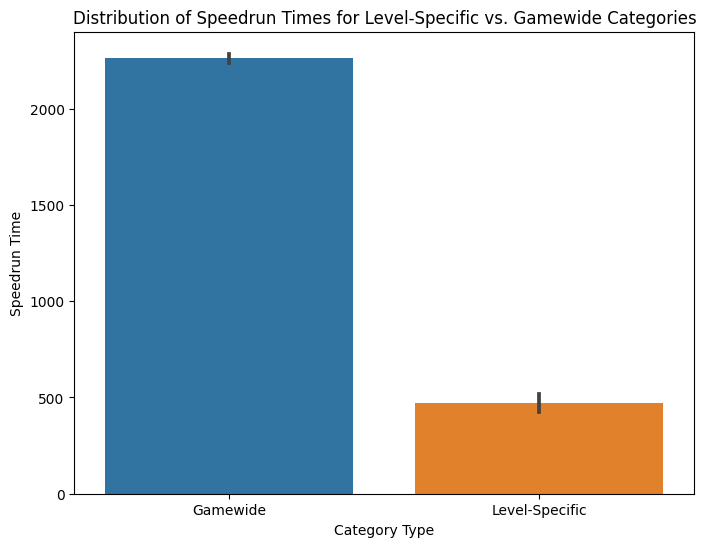

In [18]:
# Plot the distribution of speedrun times for level-specific and gamewide categories
plt.figure(figsize=(8, 6))
sns.barplot(x='is_level_cat', y='speedrun_time', data=df)
plt.title("Distribution of Speedrun Times for Level-Specific vs. Gamewide Categories")
plt.xlabel("Category Type")
plt.ylabel("Speedrun Time")
plt.xticks(ticks=[0, 1], labels=['Gamewide', 'Level-Specific'], rotation=0)
plt.show()


**What is the distribution of speedrun times for each player pronoun?**

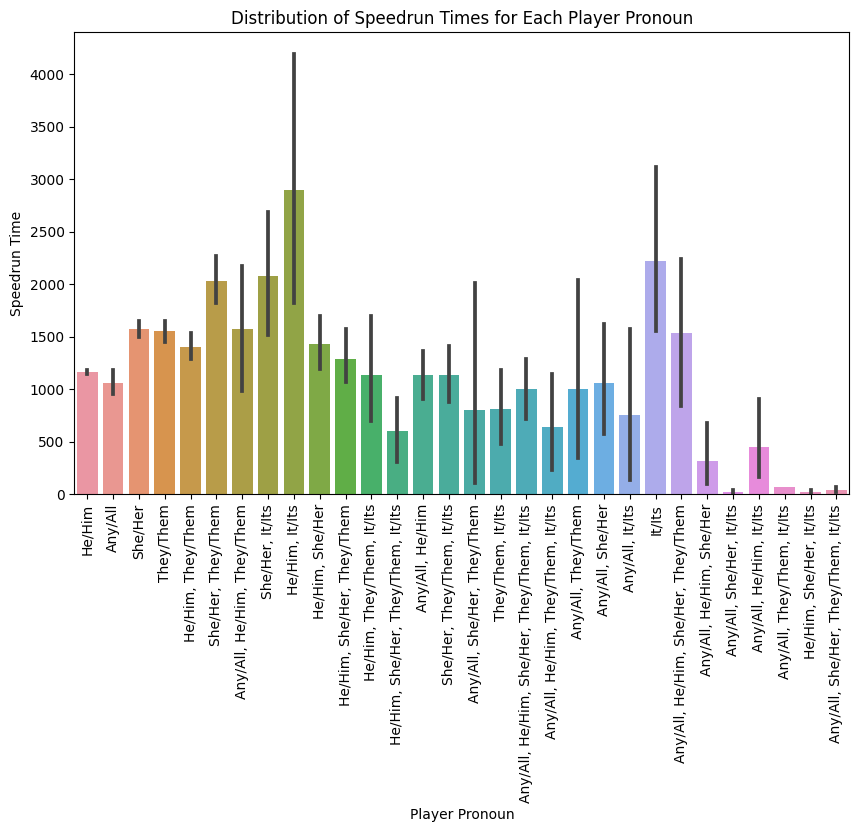

In [19]:
# Plot the distribution of speedrun times for each player pronoun
plt.figure(figsize=(10, 6))
sns.barplot(x='player_pronouns', y='speedrun_time', data=df)
plt.title("Distribution of Speedrun Times for Each Player Pronoun")
plt.xlabel("Player Pronoun")
plt.xticks(rotation=90)
plt.ylabel("Speedrun Time")
plt.show()


**How many speedruns have been verified each year?**

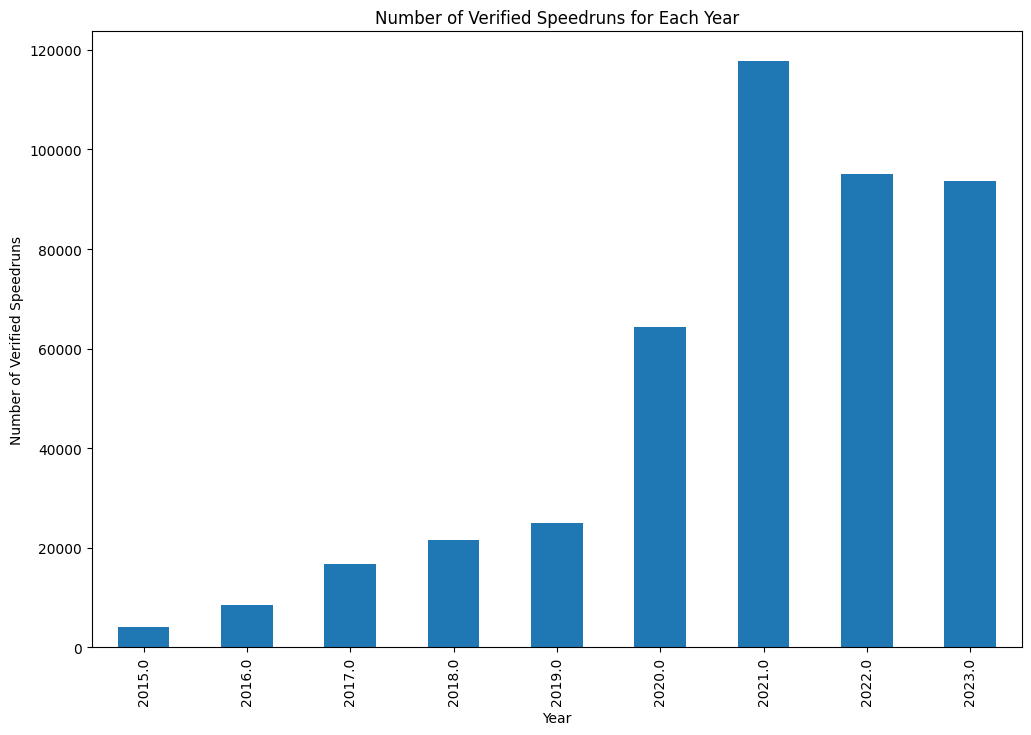

In [20]:
# Extract the year from the 'verify_date' column
df['verify_year'] = pd.to_datetime(df['verify_date']).dt.year

# Count the number of verified speedruns for each year
verified_speedruns_per_year = df[df['is_verified']]['verify_year'].value_counts().sort_index()

# Plot the number of verified speedruns for each year
plt.figure(figsize=(12, 8))
verified_speedruns_per_year.plot(kind='bar')
plt.title("Number of Verified Speedruns for Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Verified Speedruns")
plt.show()


**Is there a correlation between the release year of the platform and speedrun times?**

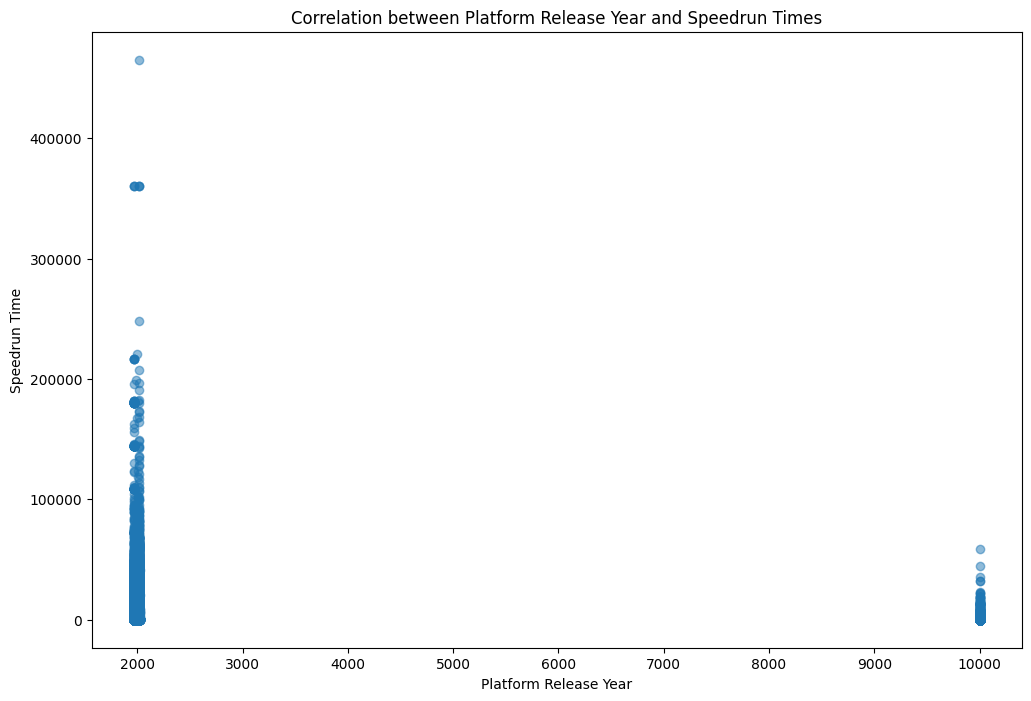

In [21]:
# Plot a scatter plot to explore the correlation
plt.figure(figsize=(12, 8))
plt.scatter(df['platform_released_year'], df['speedrun_time'], alpha=0.5)
plt.title("Correlation between Platform Release Year and Speedrun Times")
plt.xlabel("Platform Release Year")
plt.ylabel("Speedrun Time")
plt.show()


**How does the speedrun time correlate with the player's signup date?**

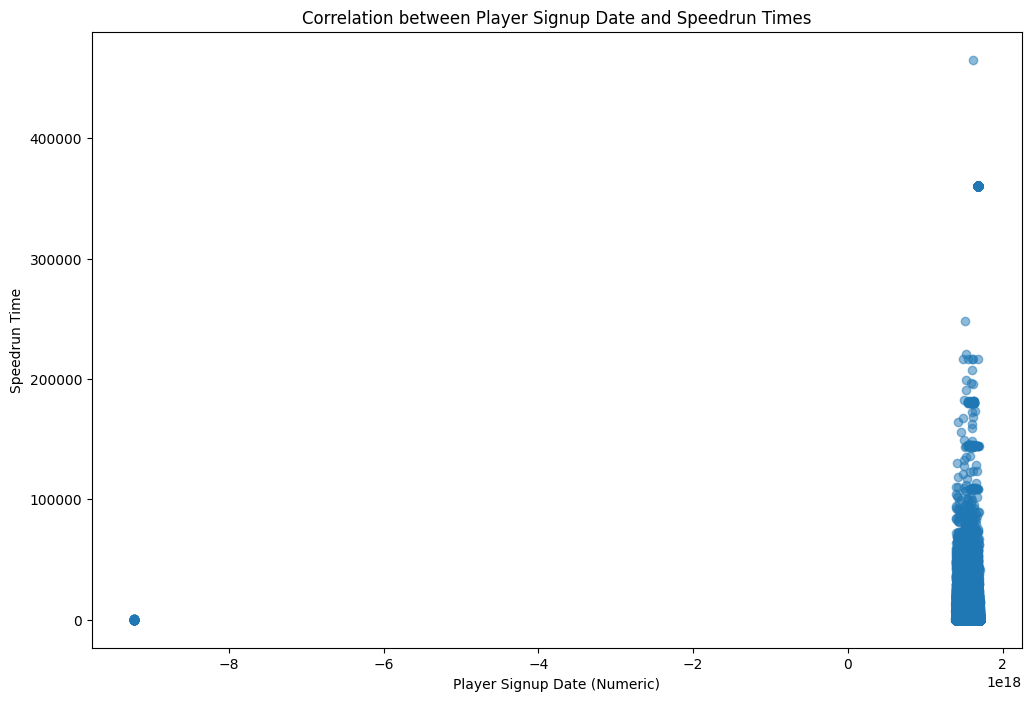

In [22]:
# Convert signup date to numeric for scatter plot
df['signup_numeric'] = pd.to_datetime(df['player_signup_date']).astype(int)

# Plot a scatter plot to explore the correlation
plt.figure(figsize=(12, 8))
plt.scatter(df['signup_numeric'], df['speedrun_time'], alpha=0.5)
plt.title("Correlation between Player Signup Date and Speedrun Times")
plt.xlabel("Player Signup Date (Numeric)")
plt.ylabel("Speedrun Time")
plt.show()


**What is the relationship between the number of runs submitted by a player and their average speedrun time?**

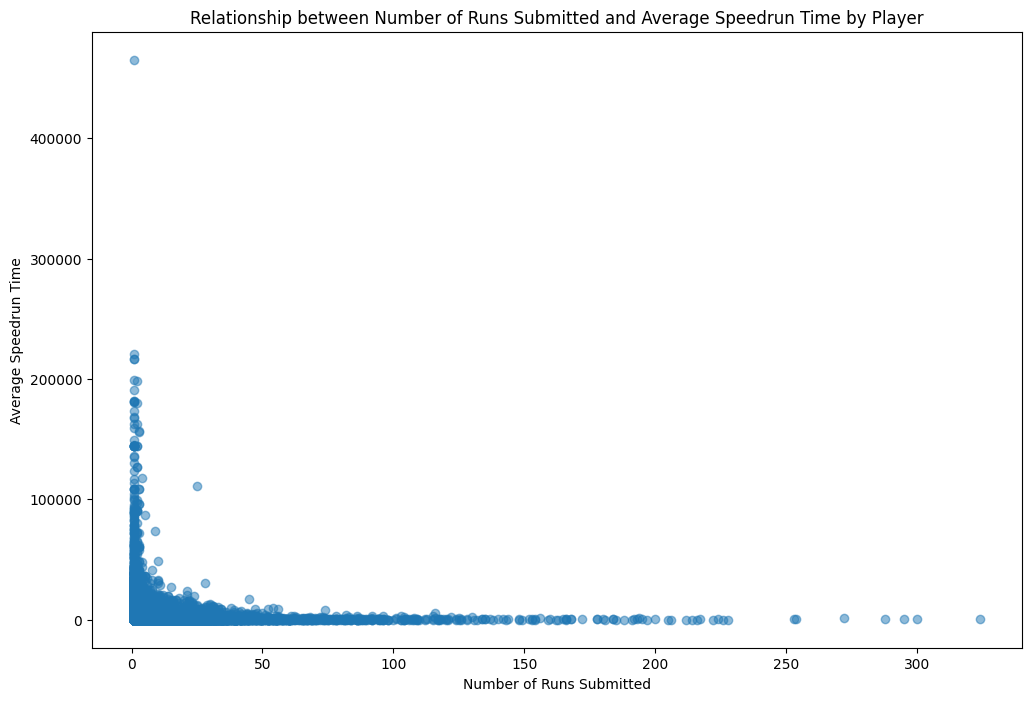

In [23]:
# Calculate the average speedrun time for each player
avg_speedrun_time_by_player = df.groupby('player_name')['speedrun_time'].mean().reset_index()

# Count the number of runs submitted by each player
num_runs_by_player = df['player_name'].value_counts().reset_index()
num_runs_by_player.columns = ['player_name', 'num_runs']

# Merge the dataframes
merged_df = pd.merge(avg_speedrun_time_by_player, num_runs_by_player, on='player_name')

# Plot a scatter plot to explore the relationship
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['num_runs'], merged_df['speedrun_time'], alpha=0.5)
plt.title("Relationship between Number of Runs Submitted and Average Speedrun Time by Player")
plt.xlabel("Number of Runs Submitted")
plt.ylabel("Average Speedrun Time")
plt.show()


**How does the player's signup date correlate with the number of runs they have submitted?**

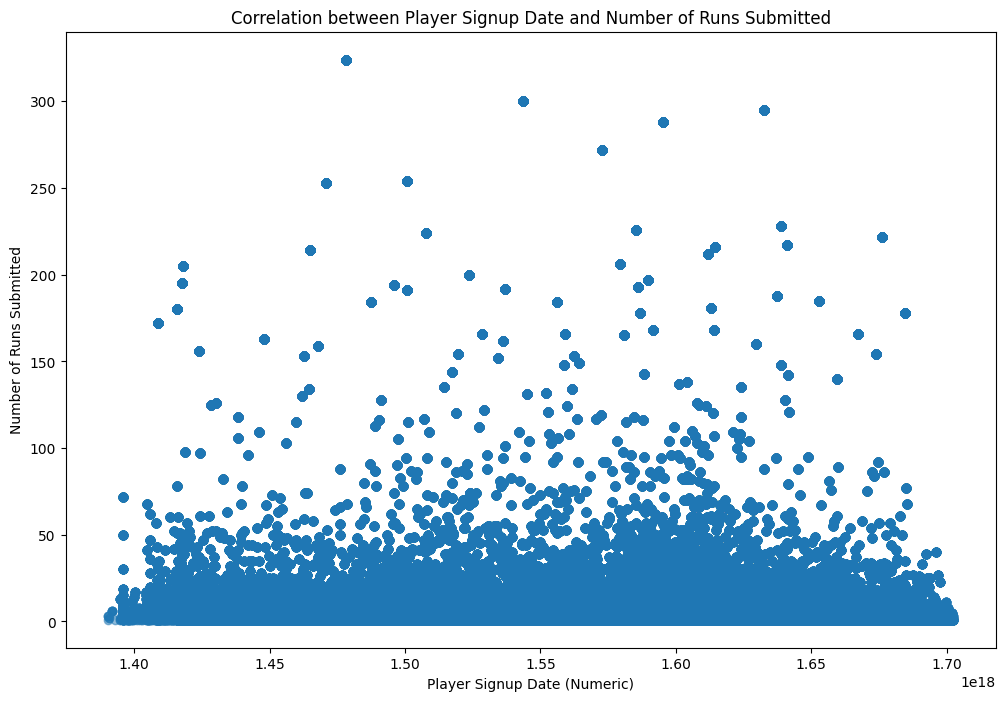

In [24]:
# Plot a scatter plot to explore the correlation
plt.figure(figsize=(12, 8))
plt.scatter(df['signup_numeric'], df.groupby('player_name')['run_id'].transform('count'), alpha=0.5)
plt.title("Correlation between Player Signup Date and Number of Runs Submitted")
plt.xlabel("Player Signup Date (Numeric)")
plt.ylabel("Number of Runs Submitted")
plt.show()


**What is the relationship between the release year of the platform and the number of runs submitted?**

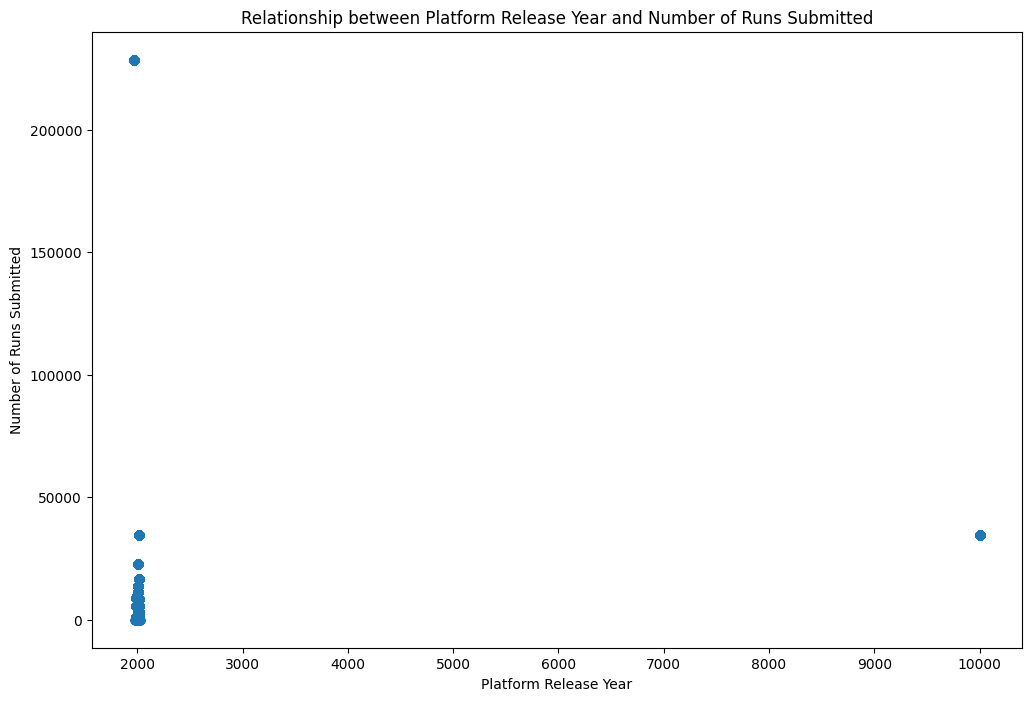

In [25]:
# Plot a scatter plot to explore the relationship
plt.figure(figsize=(12, 8))
plt.scatter(df['platform_released_year'], df.groupby('platform_name')['run_id'].transform('count'), alpha=0.5)
plt.title("Relationship between Platform Release Year and Number of Runs Submitted")
plt.xlabel("Platform Release Year")
plt.ylabel("Number of Runs Submitted")
plt.show()
